In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [3]:
watercolor = 'lightskyblue'
landcolour = 'papayawhip'
cmap = (plt.get_cmap('plasma'))
cmap.set_bad('black')

<ipython-input-3-078201c8d412>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("plasma"))
  cmap.set_bad('black')


In [4]:
mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [20]:
data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first30_oilpresence.nc')

In [21]:
imin, imax = 520, 720
jmin, jmax = 100, 300
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)

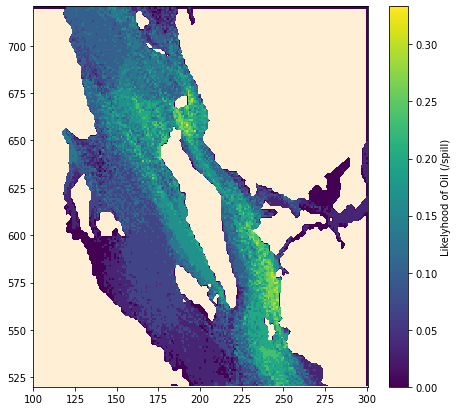

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7))
colours = ax.pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, data3d.presence[39, imin:imax, jmin:jmax], 
              );
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Likelyhood of Oil (/spill)')
viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour);
viz_tools.set_aspect(ax);
fig.savefig('Likelyhood_for_240.png')

In [31]:
print (data3d.presence[0].max())

<xarray.DataArray 'presence' ()>
array(0.)
Coordinates:
    grid_z   int16 0


In [42]:
myarray = np.array(data3d.presence.max(axis=0))

In [45]:
myarray.shape

(896, 396)

In [47]:
newarray = myarray.max(axis=0)

In [48]:
newarray.max()

0.3333333333333333

In [49]:
newarray.argmax()

191

In [50]:
newarray.shape

(396,)

In [54]:
myarray[:, 191].argmax()

657